ref: Python machine learning : machine learning and deep learning with Python, scikit-learn, and TensorFlow (Raschka SMirjalili V)

In [7]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['data'].shape

(150, 4)

In [6]:
X = iris.data[:, [2, 3]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train.shape,X_test.shape

((105, 2), (45, 2))

In [15]:
np.bincount(y),np.bincount(y_train),np.bincount(y_test) 

(array([50, 50, 50]), array([35, 35, 35]), array([15, 15, 15]))

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std.shape,X_test_std.shape

((105, 2), (45, 2))

In [66]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [80]:
ppn = Perceptron(max_iter=45, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=45, random_state=1)

In [81]:
y_pred = ppn.predict(X_test_std)
print(f"misclassified: {(y_pred!=y_test).sum()}")

misclassified: 1


In [82]:
print(f"accuracy:{accuracy_score(y_test,y_pred):.2}")
print(f"accuracy:{ppn.score(X_test_std,y_test):.2}")

accuracy:0.98
accuracy:0.98


In [84]:
import matplotlib.pyplot as plt

In [96]:
import matplotlib as mpl

def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black'
                   )
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')


/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_25016/637873979.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


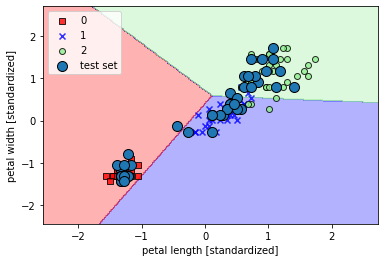

In [99]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

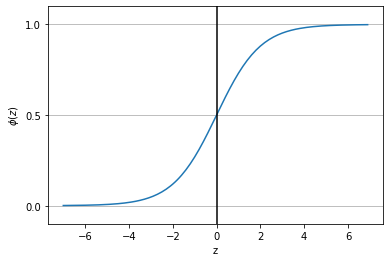

In [121]:
import numpy as np

def sigmoid(z):
    return 1/(np.exp(-z)+1)

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z);
plt.axvline(0.0, color='k');
plt.ylim(-0.1,1.1);
plt.xlabel('z');
plt.ylabel('$\phi (z)$');
plt.yticks([0.0, 0.5, 1]);
ax = plt.gca();
ax.yaxis.grid(True);

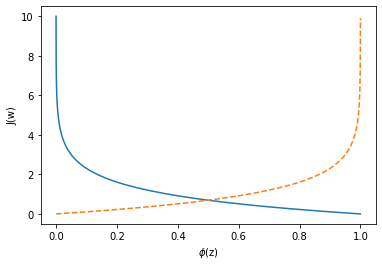

In [130]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1');
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0');
plt.xlabel('$\phi$(z)');
plt.ylabel('J(w)');

In [157]:
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        size = 1+X.shape[1]
        self.costs_ = []
        
        for _ in range(self.n_iter):
            output = self.act_fn(self.net_input(X))
            error = (y-output)
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            cost = (-y.dot(np.log(output))-(1-y).dot(np.log(1-output)))
            self.costs_.append(cost)
        
        return self
    
    def act_fn(self, z):
        return 1./(1.+np.exp(-np.clip(z, -250, 250)))
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1) 

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_25016/637873979.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


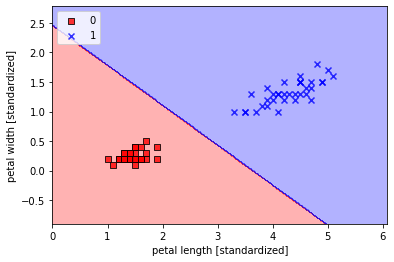

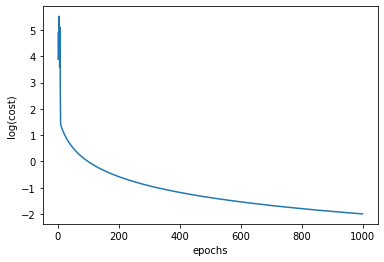

In [166]:
X_train_01_subset = X_train[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000)
lrgd.fit(X_train_01_subset, y_train_01_subset);

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1,len(lrgd.costs_)+1), np.log(lrgd.costs_));
plt.xlabel('epochs');
plt.ylabel('log(cost)');
plt.show()

In [167]:
from sklearn.linear_model import LogisticRegression 

In [175]:
lr = LogisticRegression(C=100., random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_25016/637873979.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


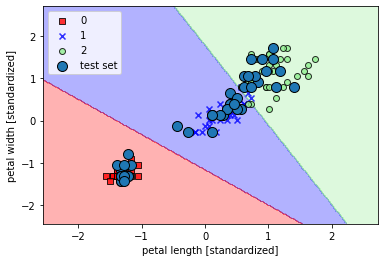

In [177]:
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [183]:
lr.predict_proba(X_test_std[:3,:])

array([[9.37368464e-13, 3.91458193e-04, 9.99608542e-01],
       [9.93631074e-01, 6.36892585e-03, 1.20730798e-15],
       [9.98707332e-01, 1.29266792e-03, 1.82177043e-17]])

In [184]:
lr.predict_proba(X_test_std[:3,:]).argmax(1)

array([2, 0, 0])

In [185]:
y_test[:3]

array([2, 0, 0])

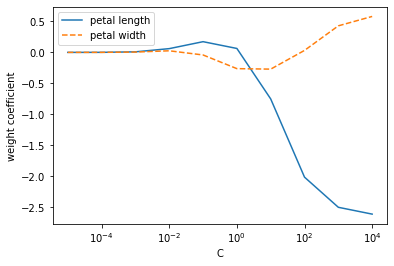

In [214]:
weights, params = [], []
for c in range(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], label='petal width', linestyle='--')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()